<a href="https://colab.research.google.com/github/rishikaa1/cognifyz_technologies/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Predict Restaurant Ratings
Objective: Build a machine learning model to predict the agreggate rating of a restaurant based on other features.

# Importing the libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Loading the dataset

In [2]:
data = pd.read_csv('Dataset .csv')
print(data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

# Dropping unnecessary columns

In [3]:
data = data.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Currency'], axis=1)
print(data)

      Average Cost for two Has Table booking Has Online delivery  \
0                     1100               Yes                  No   
1                     1200               Yes                  No   
2                     4000               Yes                  No   
3                     1500                No                  No   
4                     1500               Yes                  No   
...                    ...               ...                 ...   
9546                    80                No                  No   
9547                   105                No                  No   
9548                   170                No                  No   
9549                   120                No                  No   
9550                    55                No                  No   

     Is delivering now Switch to order menu  Price range  Aggregate rating  \
0                   No                   No            3               4.8   
1                   No     

# Checking for missing values

In [4]:
data.isnull().sum()

Average Cost for two    0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Encoding categorical data

In [6]:
encoder = LabelEncoder()
data['Has Table booking'] = encoder.fit_transform(data['Has Table booking'])
data['Has Online delivery'] = encoder.fit_transform(data['Has Online delivery'])
data['Is delivering now'] = encoder.fit_transform(data['Is delivering now'])
data['Switch to order menu'] = encoder.fit_transform(data['Switch to order menu'])
data['Rating color'] = encoder.fit_transform(data['Rating color'])
data['Rating text'] = encoder.fit_transform(data['Rating text'])
print(data)

      Average Cost for two  Has Table booking  Has Online delivery  \
0                     1100                  1                    0   
1                     1200                  1                    0   
2                     4000                  1                    0   
3                     1500                  0                    0   
4                     1500                  1                    0   
...                    ...                ...                  ...   
9546                    80                  0                    0   
9547                   105                  0                    0   
9548                   170                  0                    0   
9549                   120                  0                    0   
9550                    55                  0                    0   

      Is delivering now  Switch to order menu  Price range  Aggregate rating  \
0                     0                     0            3               4.8   

# Correlation Matrix

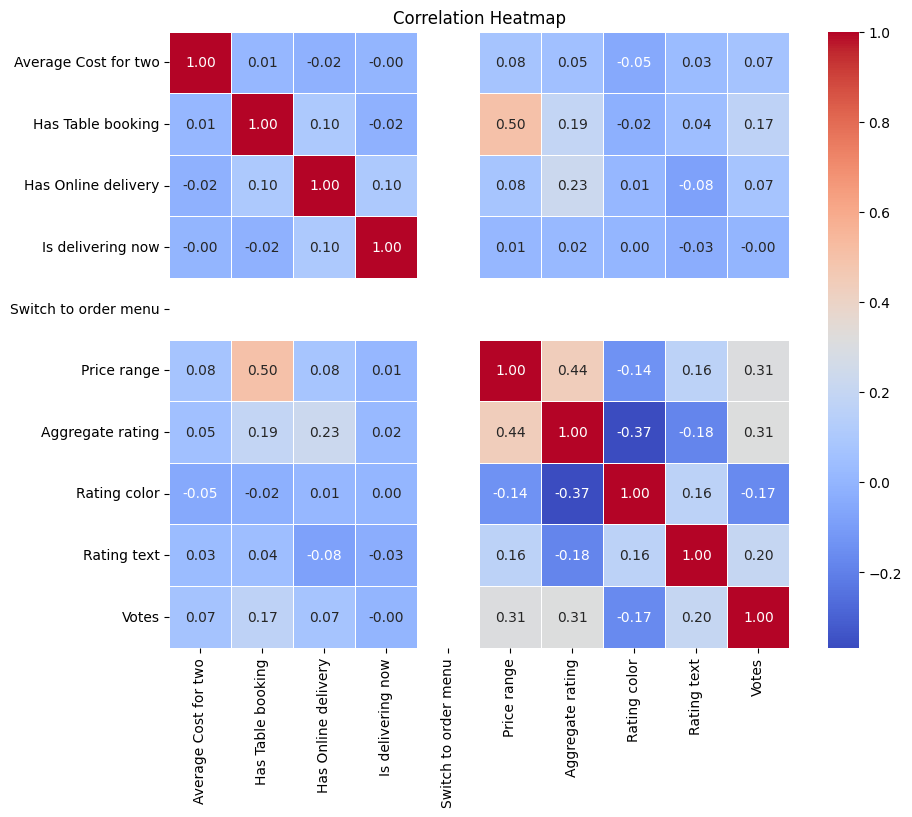

In [7]:
correlation_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Splitting dataset into training set and test set

In [8]:
X = data.drop('Aggregate rating', axis=1)
y = data['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Decision Tree Regressor Model

Training the model

In [9]:
regressor = DecisionTreeRegressor(min_samples_leaf=.0001)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=0.0001)

Predicting Test set results

In [10]:
y_pred = regressor.predict(X_test)



# Evaluating the Model Performance

In [11]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared Error: {r2:.2f}")


Mean Squared Error: 0.05
R-squared Error: 0.98


#Conclusion

MSE of 0.0.5 implies that the model's predictions have a minimal variance and the errors are very small. This indicates that the model's predictions are highly accurate.

R2 score of 0.98 indicates that the model can explain and predict the target variable with high effectiveness, as it is able to account for most of the variation in the target variable.

After performing feature selection and training the model on the selected columns, namely 'Average cost for two', 'Has Table Booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Rating color', 'Rating text' & 'Votes', the high R2 score of 0.98 suggests that the chosen columns are the influential features affecting restaurant rating.